<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/1_6_data_analysis_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


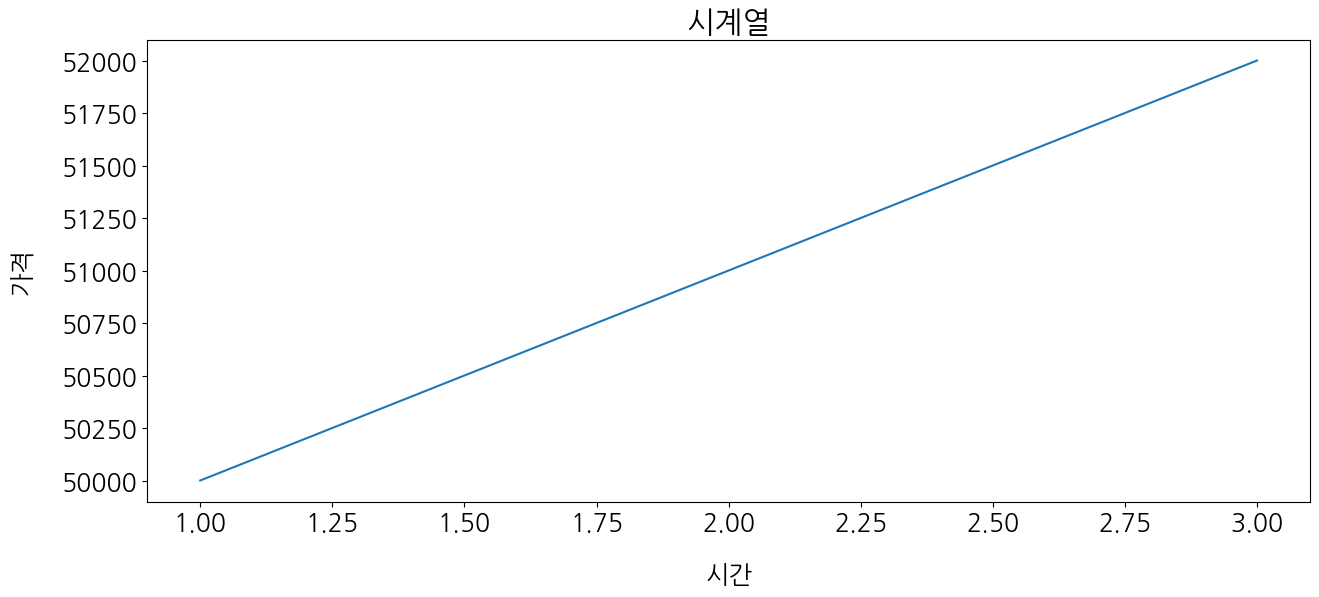

In [2]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

graph_title = '시계열'
ax.set_title(f'{graph_title}')
ax.set_xlabel('시간', labelpad=20)
ax.set_ylabel('가격', labelpad=20)

ax.plot([1, 2, 3], [50000, 51000, 52000])

plt.show()

In [20]:
# http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do
# http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

raw = pd.read_csv("서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding="cp949")
raw.shape

(66827, 52)

In [21]:
raw.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202405,1호선,동대문,640,13,12296,2248,9942,8379,16314,...,9845,800,2882,4,260,0,0,0,0,20240603
1,202405,1호선,동묘앞,283,2,3219,948,4043,5977,8718,...,5461,147,2140,2,309,0,0,0,0,20240603
2,202405,1호선,서울역,712,15,8896,9542,14747,61682,43154,...,16695,3655,4788,0,282,0,0,0,0,20240603
3,202405,1호선,시청,106,2,2365,5549,4256,27042,8011,...,4696,623,1156,2,31,0,0,0,0,20240603
4,202405,1호선,신설동,362,31,9390,2496,10861,10733,22800,...,10655,441,3275,3,5,0,0,0,0,20240603


In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66827 entries, 0 to 66826
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           66827 non-null  int64 
 1   호선명           66827 non-null  object
 2   지하철역          66827 non-null  object
 3   04시-05시 승차인원  66827 non-null  int64 
 4   04시-05시 하차인원  66827 non-null  int64 
 5   05시-06시 승차인원  66827 non-null  int64 
 6   05시-06시 하차인원  66827 non-null  int64 
 7   06시-07시 승차인원  66827 non-null  int64 
 8   06시-07시 하차인원  66827 non-null  int64 
 9   07시-08시 승차인원  66827 non-null  int64 
 10  07시-08시 하차인원  66827 non-null  int64 
 11  08시-09시 승차인원  66827 non-null  int64 
 12  08시-09시 하차인원  66827 non-null  int64 
 13  09시-10시 승차인원  66827 non-null  int64 
 14  09시-10시 하차인원  66827 non-null  int64 
 15  10시-11시 승차인원  66827 non-null  int64 
 16  10시-11시 하차인원  66827 non-null  int64 
 17  11시-12시 승차인원  66827 non-null  int64 
 18  11시-12시 하차인원  66827 non-null  int64 
 19  12시-

In [23]:
df = raw.melt(id_vars=["사용월", "호선명", "지하철역"], var_name="시간승하차", value_name="인원수")
df.head()

,사용월,호선명,지하철역,시간승하차,인원수
0,202405,1호선,동대문,04시-05시 승차인원,640
1,202405,1호선,동묘앞,04시-05시 승차인원,283
2,202405,1호선,서울역,04시-05시 승차인원,712
3,202405,1호선,시청,04시-05시 승차인원,106
4,202405,1호선,신설동,04시-05시 승차인원,362


In [24]:
df["호선명"].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '서해선', '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선',
       '중앙선', '9호선2단계'], dtype=object)

In [25]:
df["시간승하차"].unique()

array(['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원',
       '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원',
       '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원',
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원',
       '작업일자'], dtype=object)

In [26]:
print(df.shape)
df = df[df["시간승하차"] != "작업일자"].copy()
print(df.shape)

(3274523, 5)
(3207696, 5)


In [27]:
df.describe()

,사용월,인원수
count,3.207696e+06,3.207696e+06
mean,2.019382e+05,1.434943e+04
std,2.712974e+02,2.308577e+04
min,2.015010e+05,0.000000e+00
25%,2.017060e+05,1.006000e+03
50%,2.019110e+05,6.950000e+03
75%,2.022020e+05,1.809200e+04
max,2.024050e+05,4.654060e+05


In [28]:
df.describe(include="object")

,호선명,지하철역,시간승하차
count,3207696,3207696,3207696
unique,28,597,48
top,5호선,서울역,04시-05시 승차인원
freq,286656,28992,66827


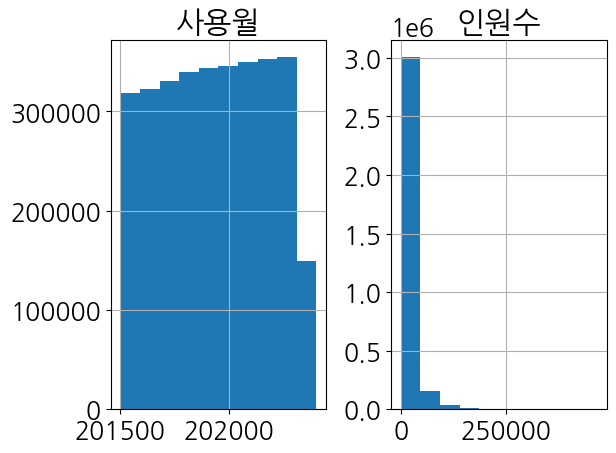

In [29]:
df.hist()
plt.show()

In [30]:
# 시간승하차 로 "시간", "승하차" 변수를 생성
df["시간"] = df["시간승하차"].str.split(expand=True)[0]
df["승하차"] = df["시간승하차"].str.split(expand=True)[1]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차
0,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차인원


In [31]:
# "시간"에서 "시간대"를 추출
df["시간대"] = df["시간"].str[:2].astype(int)
df["시간대"]

0          4
1          4
2          4
3          4
4          4
          ..
3207691    3
3207692    3
3207693    3
3207694    3
3207695    3
Name: 시간대, Length: 3207696, dtype: int64

In [32]:
# 출퇴근 변수
# 7~10시는 출근, 17~21시는 퇴근
df.loc[(df["시간대"] >= 7) & (df["시간대"] <= 10), "출퇴근"] = "출근"
df.loc[(df["시간대"] >= 17) & (df["시간대"] <= 21), "출퇴근"] = "퇴근"
df.head()

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근
0,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차인원,4,NaN
1,202405,1호선,동묘앞,04시-05시 승차인원,283,04시-05시,승차인원,4,NaN
2,202405,1호선,서울역,04시-05시 승차인원,712,04시-05시,승차인원,4,NaN
3,202405,1호선,시청,04시-05시 승차인원,106,04시-05시,승차인원,4,NaN
4,202405,1호선,신설동,04시-05시 승차인원,362,04시-05시,승차인원,4,NaN


In [33]:
# 승하차 컬럼에서 문자열 대체로 "인원" 텍스트를 제거
df["승하차"] = df["승하차"].str.replace("인원", "")
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근
0,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차,4,NaN


In [34]:
df["연도"] = df["사용월"].astype(str).str[:4]
df["월"] = df["사용월"].astype(str).str[4:]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
0,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차,4,NaN,2024,05


<ipython-input-35-68056b0a56fa>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, '연도별 합계 인원')

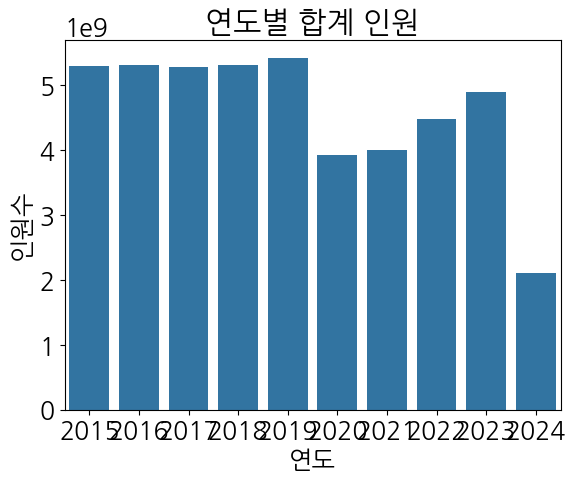

In [35]:
sns.barplot(data=df.sort_values("연도"), x="연도", y="인원수", ci=None, estimator=np.sum)
plt.title("연도별 합계 인원")

In [ ]:
df_192021 = df[df["연도"].isin(["2019", "2020", "2021"])]
df.shape, df_192021.shape

((3207696, 11), (1039392, 11))

<ipython-input-21-a35c35d4ef6c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_192021, x="연도", y="인원수", ci=None, estimator=np.sum)


Text(0.5, 1.0, '연도별 합계 인원')

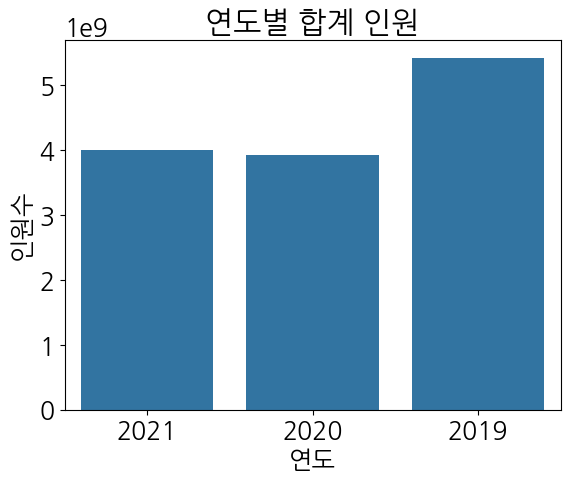

In [ ]:
sns.barplot(data=df_192021, x="연도", y="인원수", ci=None, estimator=np.sum)
plt.title("연도별 합계 인원")

<ipython-input-22-ce0079c0fc0c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_192021, x="인원수", y="호선명", ci=None, estimator=np.sum, hue="연도")


Text(0.5, 1.0, '호선별 합계 인원')

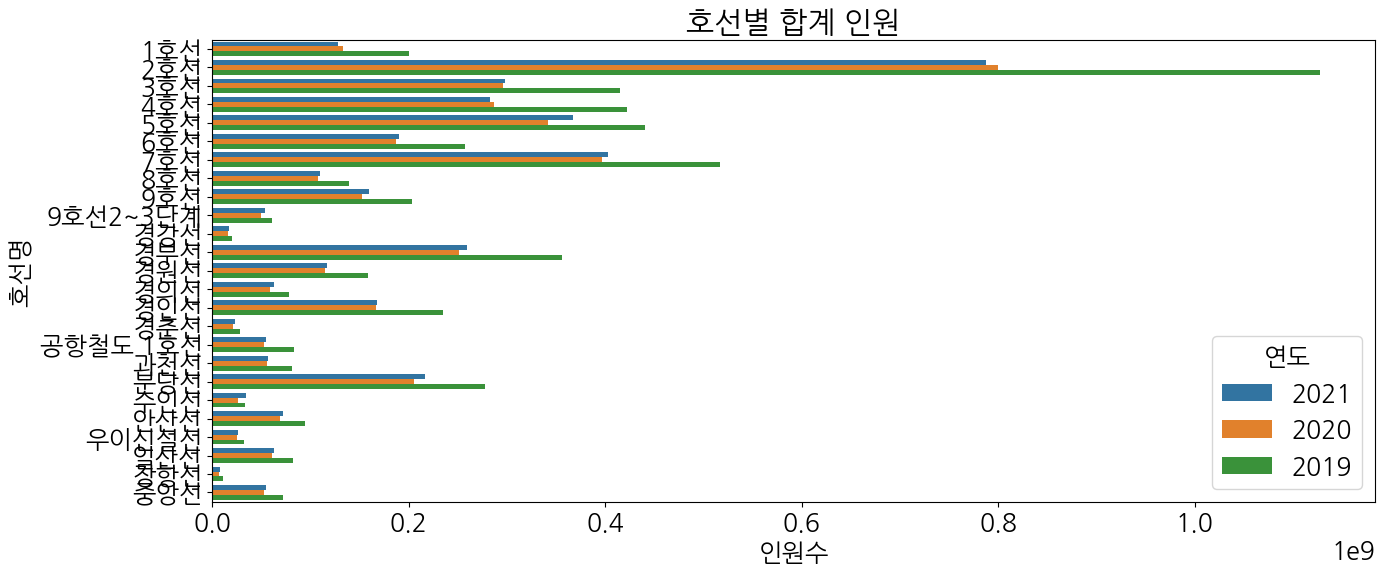

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_192021, x="인원수", y="호선명", ci=None, estimator=np.sum, hue="연도")
plt.title("호선별 합계 인원")

In [ ]:
df_line_year = df.groupby(["호선명", "연도"])["인원수"].sum().unstack()
df_line_year.style.background_gradient().format("{:,.0f}")

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
호선명,,,,,,,,,,
1호선,"209,611,322","209,253,173","199,479,727","196,615,316","200,161,236","132,923,921","128,142,824","147,431,253","167,318,877","72,113,023"
2호선,"1,136,532,805","1,130,426,567","1,113,126,253","1,120,273,637","1,127,099,473","799,725,099","787,069,731","889,689,574","968,710,503","413,052,328"
3호선,"407,149,170","407,299,680","406,715,836","409,099,330","415,110,584","295,542,443","298,174,971","335,375,466","366,057,785","156,391,450"
4호선,"447,917,398","448,404,612","433,640,491","421,192,109","422,059,263","287,173,824","282,207,751","318,122,657","357,651,467","156,423,646"
5호선,"432,004,257","432,061,470","430,795,143","434,307,063","440,703,923","341,842,285","367,307,040","411,031,070","447,592,126","192,913,286"
6호선,"252,985,992","254,863,612","255,195,824","255,959,341","257,362,720","186,709,725","189,516,649","214,650,717","234,208,817","100,717,488"
7호선,"525,502,631","520,579,948","510,012,555","510,947,444","516,694,675","396,263,946","402,285,713","379,725,995","403,631,650","173,300,698"
8호선,"119,346,230","122,631,543","128,751,279","134,434,784","139,411,556","107,526,283","109,484,692","121,745,483","132,778,378","57,488,951"
9호선,"186,857,064","189,045,279","191,462,937","193,572,786","203,031,073","152,781,668","159,441,609","179,791,247","195,400,316","83,776,262"


<ipython-input-24-4d7ab3daf33c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None)


<Axes: xlabel='사용월', ylabel='인원수'>

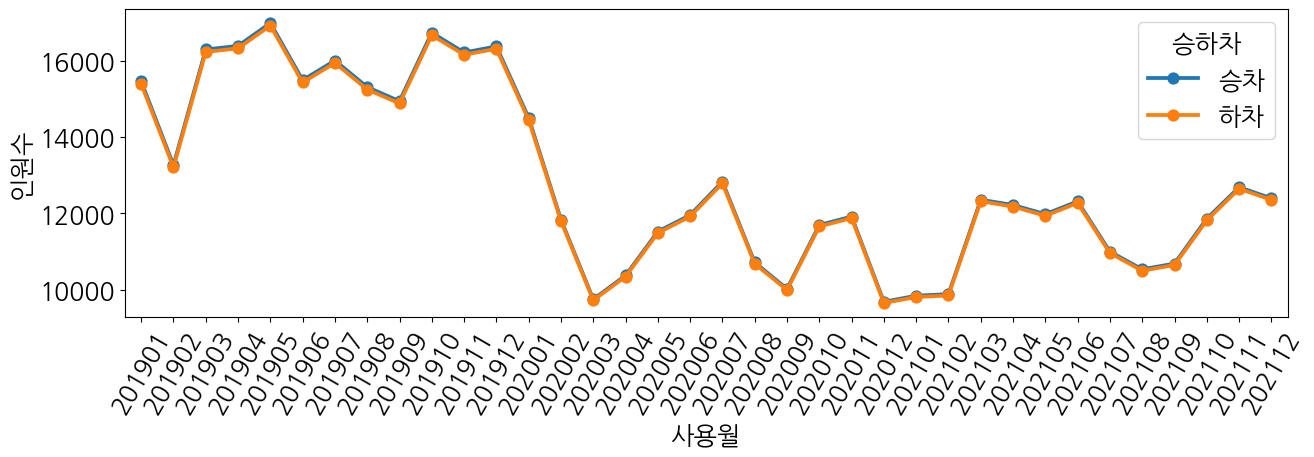

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None)

<ipython-input-25-40047accc1d1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None, estimator=np.sum)


<Axes: xlabel='사용월', ylabel='인원수'>

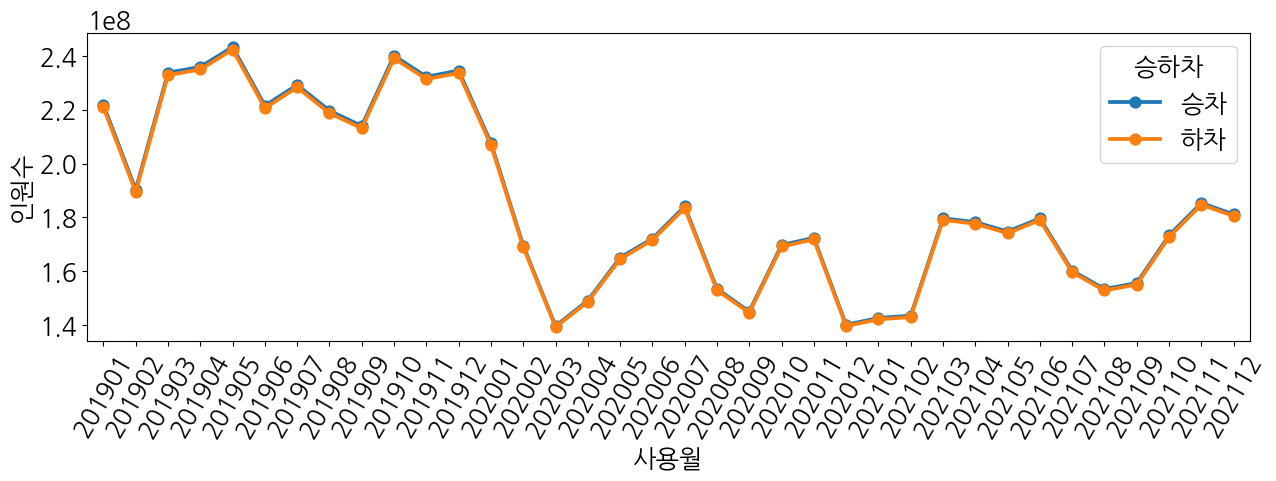

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None, estimator=np.sum)

<ipython-input-26-8a6433789f33>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="인원수", y="호선명", ci=None)


Text(0.5, 1.0, '호선별 평균 인원')

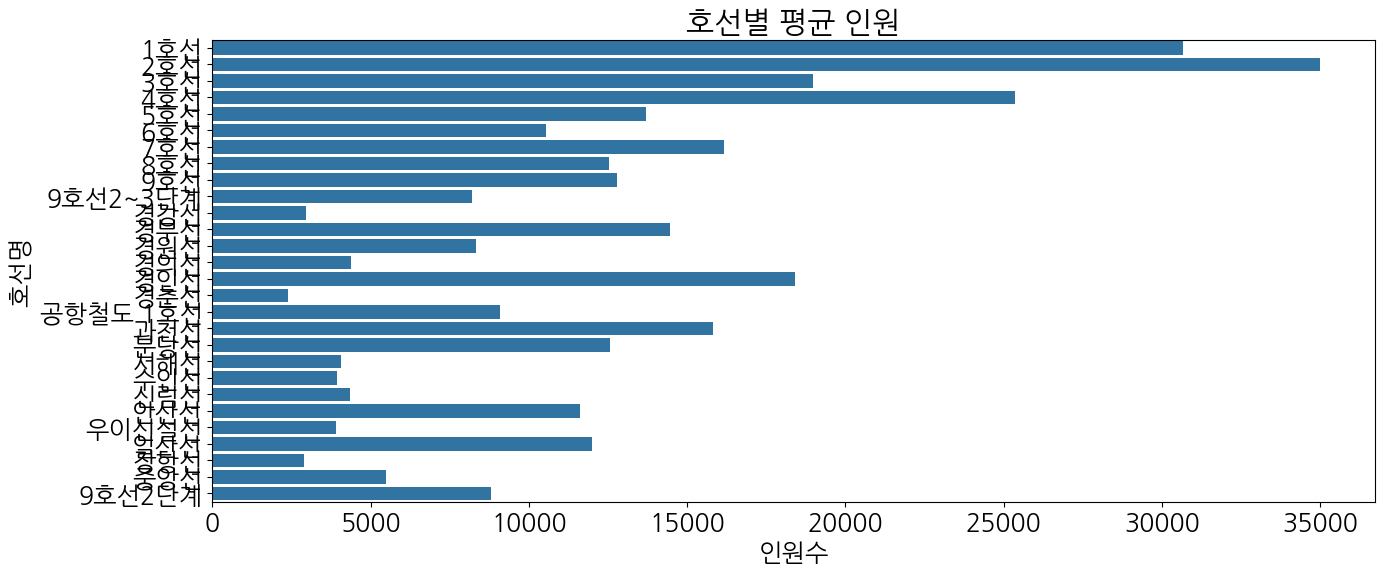

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None)
plt.title("호선별 평균 인원")

<ipython-input-27-6ef90e2f303f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum)


Text(0.5, 1.0, '호선별 합계 인원')

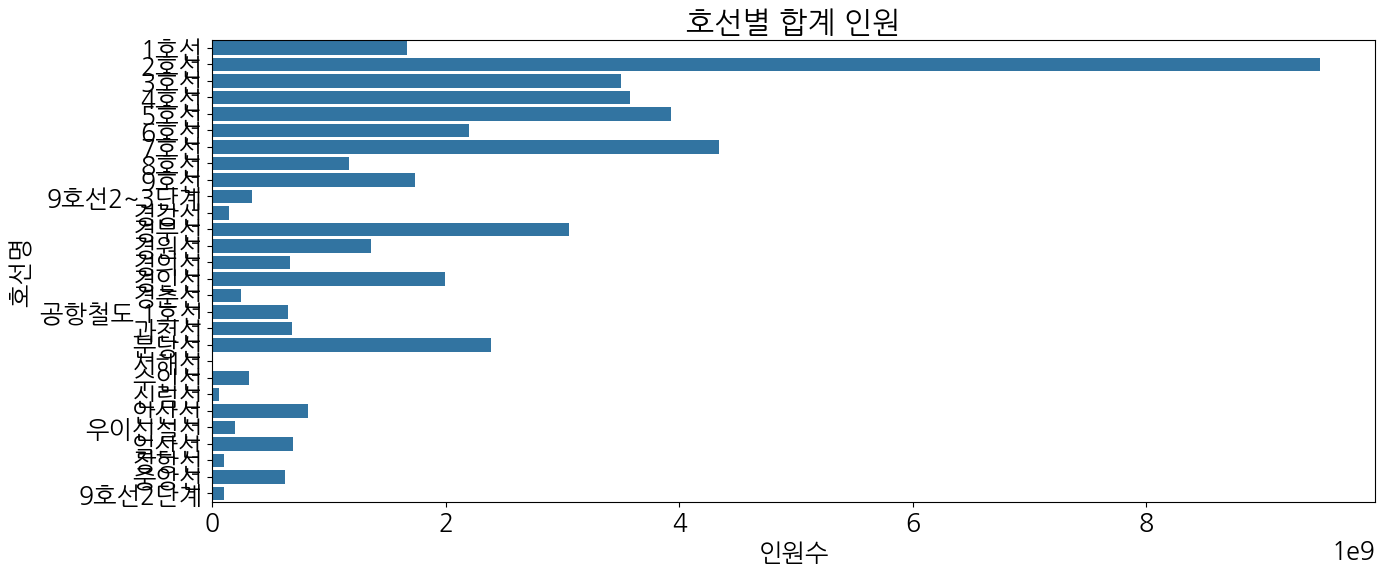

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum)
plt.title("호선별 합계 인원")

<ipython-input-28-682155b9ac3c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum, hue="승하차")


Text(0.5, 1.0, '호선별 합계 인원')

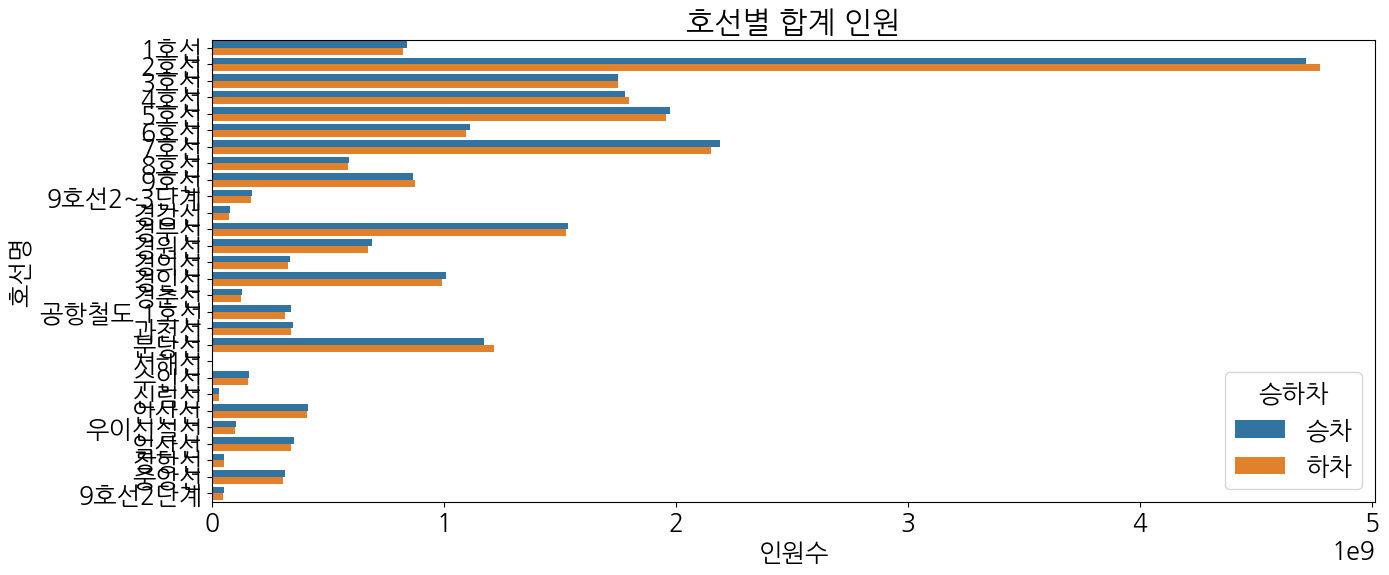

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum, hue="승하차")
plt.title("호선별 합계 인원")

<ipython-input-29-34c919eba3e8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="시간", y="인원수", ci=None, hue="승하차")


<Axes: xlabel='시간', ylabel='인원수'>

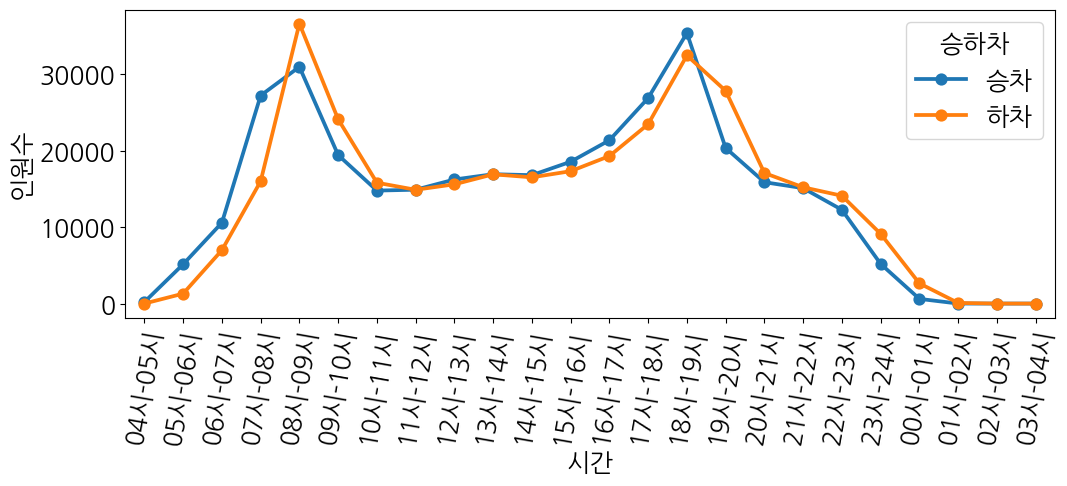

In [ ]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=80)
sns.pointplot(data=df, x="시간", y="인원수", ci=None, hue="승하차")

<ipython-input-30-ca61943a206d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_192021, x="시간", y="인원수", ci=None, hue="연도", estimator=np.sum)


<Axes: xlabel='시간', ylabel='인원수'>

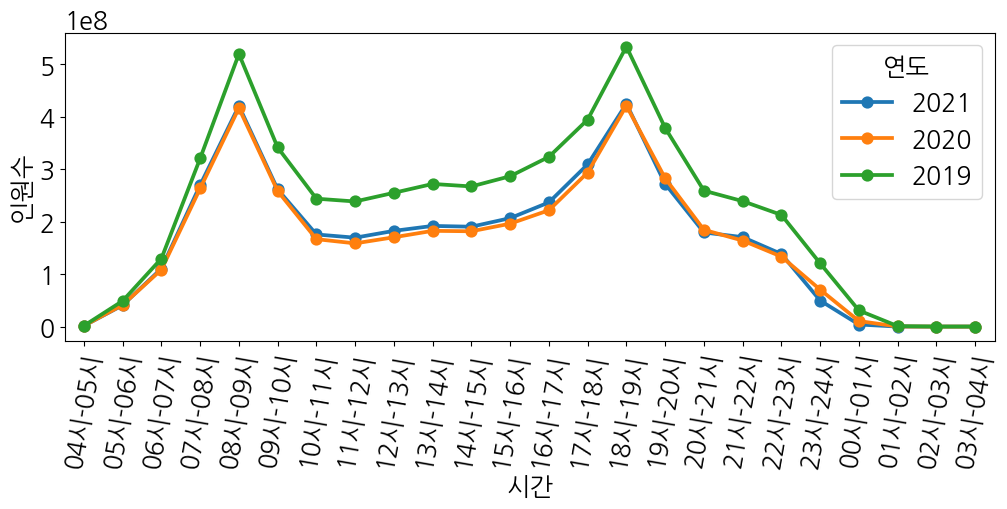

In [ ]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=80)
sns.pointplot(data=df_192021, x="시간", y="인원수", ci=None, hue="연도", estimator=np.sum)

<ipython-input-31-b5be4f3db91c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_192021, x="시간", y="인원수", kind="point",


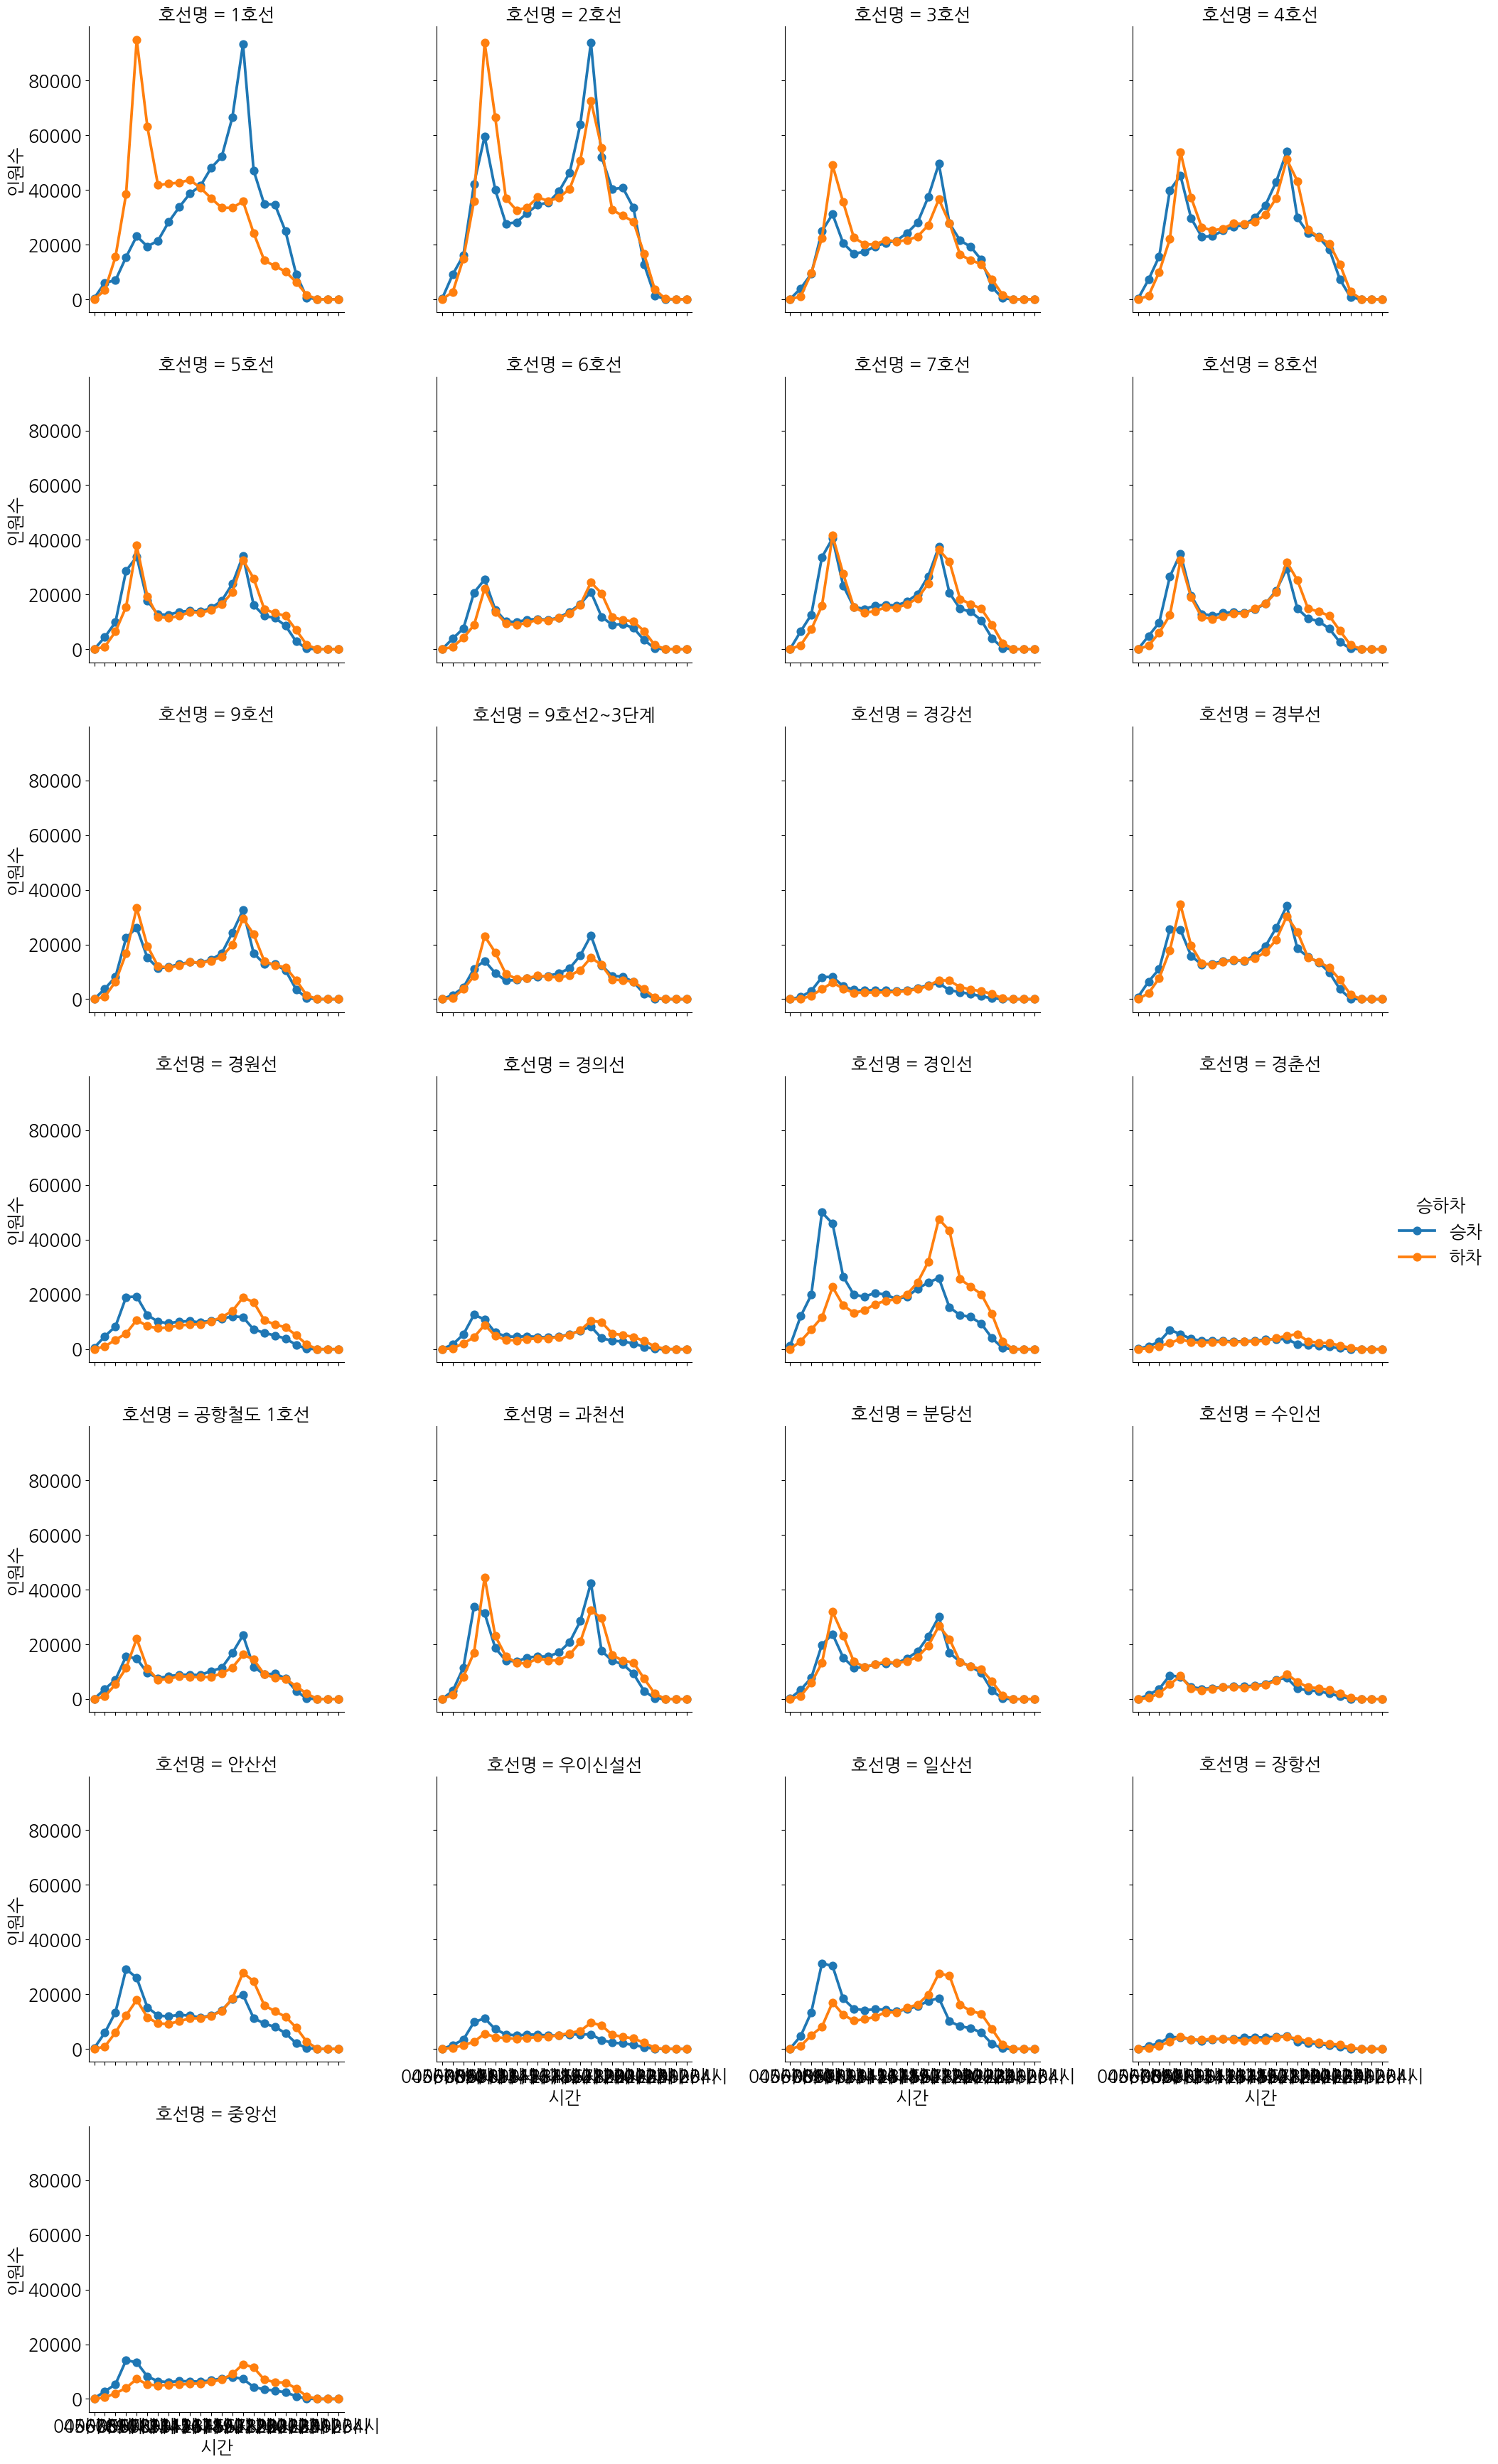

In [ ]:
sns.catplot(data=df_192021, x="시간", y="인원수", kind="point",
            ci=None, hue="승하차", col="호선명", col_wrap=4)

In [ ]:

df_192021[df_192021["승하차"] == "하차"].sort_values(by=["인원수", "지하철역"], ascending=False).head(20)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
636963,201907,7호선,가산디지털단지,08시-09시 하차인원,456549,08시-09시,하차,8,출근,2019,07
640549,201901,7호선,가산디지털단지,08시-09시 하차인원,449728,08시-09시,하차,8,출근,2019,01
638753,201904,7호선,가산디지털단지,08시-09시 하차인원,443474,08시-09시,하차,8,출근,2019,04
770418,201907,2호선,강남,09시-10시 하차인원,439572,09시-10시,하차,9,출근,2019,07
638156,201905,7호선,가산디지털단지,08시-09시 하차인원,426188,08시-09시,하차,8,출근,2019,05
774004,201901,2호선,강남,09시-10시 하차인원,420878,09시-10시,하차,9,출근,2019,01
636797,201907,2호선,역삼,08시-09시 하차인원,416599,08시-09시,하차,8,출근,2019,07
635170,201910,7호선,가산디지털단지,08시-09시 하차인원,412238,08시-09시,하차,8,출근,2019,10
629792,202007,7호선,가산디지털단지,08시-09시 하차인원,410689,08시-09시,하차,8,출근,2020,07
623147,202106,7호선,가산디지털단지,08시-09시 하차인원,409884,08시-09시,하차,8,출근,2021,06


In [ ]:
df_192021[df_192021["승하차"] == "승차"].sort_values(by=["인원수", "지하철역"], ascending=False).head(20)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
1906477,201907,2호선,강남,18시-19시 승차인원,448390,18시-19시,승차,18,퇴근,2019,07
1910063,201901,2호선,강남,18시-19시 승차인원,431115,18시-19시,승차,18,퇴근,2019,01
1905879,201908,2호선,강남,18시-19시 승차인원,409350,18시-19시,승차,18,퇴근,2019,08
1907670,201905,2호선,강남,18시-19시 승차인원,407478,18시-19시,승차,18,퇴근,2019,05
1908267,201904,2호선,강남,18시-19시 승차인원,401901,18시-19시,승차,18,퇴근,2019,04
1904684,201910,2호선,강남,18시-19시 승차인원,396172,18시-19시,승차,18,퇴근,2019,10
1899305,202007,2호선,강남,18시-19시 승차인원,391365,18시-19시,승차,18,퇴근,2020,07
1908867,201903,2호선,강남,18시-19시 승차인원,388964,18시-19시,승차,18,퇴근,2019,03
1904087,201911,2호선,강남,18시-19시 승차인원,387701,18시-19시,승차,18,퇴근,2019,11
1903490,201912,2호선,강남,18시-19시 승차인원,386600,18시-19시,승차,18,퇴근,2019,12


In [ ]:
df_station = df_192021.groupby(by=["지하철역", "승하차", "시간", "출퇴근"])["인원수"].sum().reset_index()
df_station

,지하철역,승하차,시간,출퇴근,인원수
0,4.19민주묘지,승차,07시-08시,출근,260302
1,4.19민주묘지,승차,08시-09시,출근,297775
2,4.19민주묘지,승차,09시-10시,출근,206436
3,4.19민주묘지,승차,10시-11시,출근,164488
4,4.19민주묘지,승차,17시-18시,퇴근,213544
...,...,...,...,...,...
9481,흑석(중앙대입구),하차,17시-18시,퇴근,630774
9482,흑석(중앙대입구),하차,18시-19시,퇴근,929837
9483,흑석(중앙대입구),하차,19시-20시,퇴근,691061
9484,흑석(중앙대입구),하차,20시-21시,퇴근,447967


In [ ]:

df_station[df_station["승하차"] == "하차"].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
64,가산디지털단지,하차,08시-09시,출근,19045005
4744,선릉,하차,08시-09시,출근,14496324
5356,시청,하차,08시-09시,출근,13305650
6436,여의도,하차,08시-09시,출근,12563150
4600,서울역,하차,08시-09시,출근,12168054
209,강남,하차,09시-10시,출근,11707850
6490,역삼,하차,08시-09시,출근,11577466
208,강남,하차,08시-09시,출근,11395323
4150,삼성(무역센터),하차,08시-09시,출근,11191311
7318,을지로입구,하차,08시-09시,출근,10541809


In [ ]:
df_station[
    (df_station["승하차"] == "승차") & (df_station["출퇴근"] == "출근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
5581,신림,승차,08시-09시,출근,11014887
5580,신림,승차,07시-08시,출근,7329404
5582,신림,승차,09시-10시,출근,6593769
3979,사당,승차,08시-09시,출근,6573431
955,구로디지털단지,승차,08시-09시,출근,6471668
4555,서울대입구(관악구청),승차,08시-09시,출근,6420713
7669,잠실(송파구청),승차,08시-09시,출근,6139361
6535,연신내,승차,08시-09시,출근,5704309
1441,까치산,승차,08시-09시,출근,5445570
5545,신도림,승차,08시-09시,출근,5311956


In [ ]:
df_station[
    (df_station["승하차"] == "하차") & (df_station["출퇴근"] == "출근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
64,가산디지털단지,하차,08시-09시,출근,19045005
4744,선릉,하차,08시-09시,출근,14496324
5356,시청,하차,08시-09시,출근,13305650
6436,여의도,하차,08시-09시,출근,12563150
4600,서울역,하차,08시-09시,출근,12168054
209,강남,하차,09시-10시,출근,11707850
6490,역삼,하차,08시-09시,출근,11577466
208,강남,하차,08시-09시,출근,11395323
4150,삼성(무역센터),하차,08시-09시,출근,11191311
7318,을지로입구,하차,08시-09시,출근,10541809


In [ ]:
df_station[
    (df_station["승하차"] == "승차") & (df_station["출퇴근"] == "퇴근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
59,가산디지털단지,승차,18시-19시,퇴근,15067848
4739,선릉,승차,18시-19시,퇴근,12524665
203,강남,승차,18시-19시,퇴근,12357600
4595,서울역,승차,18시-19시,퇴근,11818987
5351,시청,승차,18시-19시,퇴근,10859549
6431,여의도,승차,18시-19시,퇴근,10689934
4145,삼성(무역센터),승차,18시-19시,퇴근,10222029
7673,잠실(송파구청),승차,18시-19시,퇴근,10068514
6485,역삼,승차,18시-19시,퇴근,9628411
7313,을지로입구,승차,18시-19시,퇴근,9032790


In [ ]:
df_station[
    (df_station["승하차"] == "하차") & (df_station["출퇴근"] == "퇴근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
7682,잠실(송파구청),하차,18시-19시,퇴근,8990491
5594,신림,하차,18시-19시,퇴근,8699492
9266,홍대입구,하차,18시-19시,퇴근,8627233
3992,사당,하차,18시-19시,퇴근,8613032
5595,신림,하차,19시-20시,퇴근,8077687
212,강남,하차,18시-19시,퇴근,7264556
464,건대입구,하차,18시-19시,퇴근,7048356
644,고속터미널,하차,18시-19시,퇴근,6824956
9265,홍대입구,하차,17시-18시,퇴근,6724193
9267,홍대입구,하차,19시-20시,퇴근,6475243


In [43]:
# https://www.data.go.kr/data/15099316/fileData.do?recommendDataYn=Y
df_location = pd.read_csv('서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv', encoding='cp949')
df_location.rename({'역명': '지하철역'}, axis=1, inplace=True)

In [44]:
df_location

,연번,호선,고유역번호(외부역코드),지하철역,위도,경도,작성일자
0,1,1,150,서울,37.553150,126.972533,1974-02-28
1,2,1,151,시청,37.563590,126.975407,1974-08-15
2,3,1,152,종각,37.570203,126.983116,1974-08-15
3,4,1,153,종로3가,37.570429,126.992095,1974-08-15
4,5,1,154,종로5가,37.570971,127.001900,1974-03-31
...,...,...,...,...,...,...,...
271,272,8,2823,남한산성입구,37.451568,127.159845,1996-10-31
272,273,8,2824,단대오거리,37.445057,127.156735,1996-12-28
273,274,8,2825,신흥,37.440952,127.147590,1996-12-28
274,275,8,2826,수진,37.437575,127.140936,1996-12-28


In [75]:
df

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월,연번,호선,고유역번호(외부역코드),위도,경도,작성일자
0,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차,4,NaN,2024,05,6.0,1.0,155.0,37.571790,127.011383,1974-04-30
1,202405,1호선,동대문,04시-05시 승차인원,640,04시-05시,승차,4,NaN,2024,05,108.0,4.0,421.0,37.570840,127.009403,1985-12-20
2,202405,1호선,동묘앞,04시-05시 승차인원,283,04시-05시,승차,4,NaN,2024,05,7.0,1.0,159.0,37.573265,127.016459,2005-12-31
3,202405,1호선,동묘앞,04시-05시 승차인원,283,04시-05시,승차,4,NaN,2024,05,204.0,6.0,2638.0,37.572275,127.015666,2002-12-31
5,202405,1호선,시청,04시-05시 승차인원,106,04시-05시,승차,4,NaN,2024,05,2.0,1.0,151.0,37.563590,126.975407,1974-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474020,201501,분당선,복정,03시-04시 승차인원,0,03시-04시,승차,3,NaN,2015,01,269.0,8.0,2821.0,37.471016,127.126746,1996-12-30
3474024,201501,분당선,선릉,03시-04시 승차인원,0,03시-04시,승차,3,NaN,2015,01,29.0,2.0,220.0,37.504257,127.048174,1982-12-30
3474027,201501,분당선,수서,03시-04시 승차인원,0,03시-04시,승차,3,NaN,2015,01,92.0,3.0,339.0,37.487507,127.101324,1993-12-10
3474085,201501,중앙선,상봉,03시-04시 승차인원,0,03시-04시,승차,3,NaN,2015,01,228.0,7.0,2722.0,37.595673,127.085708,1997-03-26


In [45]:
df = df.merge(df_location, on='지하철역', how='left')

# 위도와 경도 데이터가 없는 행을 삭제
df_cleaned = df.dropna(subset=['위도', '경도'])

In [47]:
df = df_cleaned.loc[df_cleaned['승하차'] == '승차']

In [15]:
# https://dashboard.ngrok.com/get-started/your-authtoken

# 필요한 라이브러리 설치
!pip install dash pandas plotly dash-bootstrap-components
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 14.6 MB/s eta 0:00:00


In [17]:
# ngrok 설정
from pyngrok import ngrok

ngrok.set_auth_token("2hpRS9sOCnTnBFXcCXiILjWJek6_7DAL9iCzEpn8hK5yPj1ez")


# ngrok 터널 생성
public_url = ngrok.connect()
print(f"Dash app running on: {public_url}")

# Dash 애플리케이션 코드 작성 및 실행
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc


Dash app running on: NgrokTunnel: "https://feb5-34-74-158-116.ngrok-free.app" -> "http://localhost:80"


<ipython-input-17-f0be671184fc>:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-17-f0be671184fc>:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [94]:


# 예시 데이터 준비
'''
data = {
    '지하철역명': ['역1', '역2', '역3', '역1', '역2', '역3'],
    '위도': [37.5563, 37.5558, 37.5535, 37.5563, 37.5558, 37.5535],
    '경도': [126.9723, 126.9713, 126.9690, 126.9723, 126.9713, 126.9690],
    '시간대': ['08:00', '08:00', '08:00', '09:00', '09:00', '09:00'],
    '승객 수': [500, 300, 200, 600, 400, 250]
}
df = pd.DataFrame(data)
'''

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# 레이아웃 설정
app.layout = html.Div([
    dcc.Graph(id='scatter-map'),
    dcc.Slider(
        id='time-slider',
        min=0,
        max=len(df['시간대'].unique()) - 1,
        value=0,
        marks={i: time for i, time in enumerate(df['시간대'].unique())},
        step=None
    )
])

# 콜백 함수 작성
@app.callback(
    Output('scatter-map', 'figure'),
    [Input('time-slider', 'value')]
)
def update_map(selected_time):
    filtered_df = df[(df['시간대'] == df['시간대'].unique()[selected_time]) & (df['승하차']=='승차')]

    fig = px.scatter_mapbox(
        filtered_df,
        lat='위도',
        lon='경도',
        size='인원수',
        color='인원수',
        size_max=15,
        zoom=10,
        mapbox_style="carto-positron",
        title="서울 지하철 승객 수 지도"
    )

    return fig


# 애플리케이션 실행
if __name__ == '__main__':
    app.run_server(port=8050)

<IPython.core.display.Javascript object>